[Learning Sparse Neural Networks through L0 Regularization
](https://arxiv.org/abs/1712.01312)

Let $s$ be random variable with domain $(0, 1)$. Its probability density $q_{s}(s|\phi)$ and cumulative density $Q_{s}(s|\phi)$. <br><br>
Its parameters $\phi = (log \alpha, \beta)$. Remember from concrete distribution that $\alpha = \frac{\alpha_{1}}{\alpha_{2}}$ and $\beta$ is a temperature. <br><br>

We can stretch this distribution to $(\gamma, \zeta)$, $\gamma \lt 0$, $\zeta \gt 0$. <br><br>

$u \sim U(0, 1)$ <br><br>
$s = \sigma ((log (u) - log (1-u) + log (\alpha)) / \beta)$ <br><br>
$\bar{s} = s(\zeta - \gamma) + \gamma$. <br><br>
$z = min(1, max(0, \bar{s})$

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def concrete_sample(
    n_samples: int, 
    log_alpha: float,
    temperature: float,
) -> np.ndarray:
    u = np.random.uniform(0, 1, size=n_samples)
    return sigmoid((np.log(u) - np.log(1 - u) + log_alpha) / temperature)

In [18]:
def hard_concrete_sample(
    n_samples: int,
    log_alpha: float, 
    temperature: float, 
    gamma: float, 
    zeta: float,
):
    s = concrete_sample(n_samples, log_alpha, temperature)
    return np.minimum(np.maximum(s * (zeta - gamma) + gamma, 0), 1)

In [5]:
np.log(0.65 / 0.35)

0.6190392084062236

In [9]:
x_concrete = concrete_sample(10 ** 4, 0.619, 0.1)

In [10]:
x_concrete[:10]

array([9.99817291e-01, 9.93924626e-01, 6.44964679e-05, 1.00000000e+00,
       9.99999931e-01, 6.13971638e-01, 1.00000000e+00, 9.98044197e-01,
       1.17200550e-17, 9.99999038e-01])

In [11]:
np.mean(x_concrete > 0.5)

0.6561

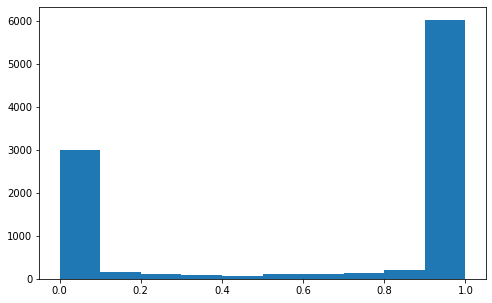

In [16]:
plt.subplots(figsize=(8, 5))
plt.hist(x_concrete);

In [19]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, 0.1, gamma=-0.5, zeta=1.5)

In [20]:
np.mean(x_hard_concrete > 0.5)

0.6537

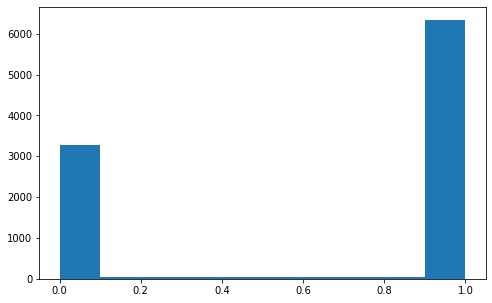

In [21]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [22]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.0433

In [23]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, 0.1, gamma=-0.1, zeta=1.1)

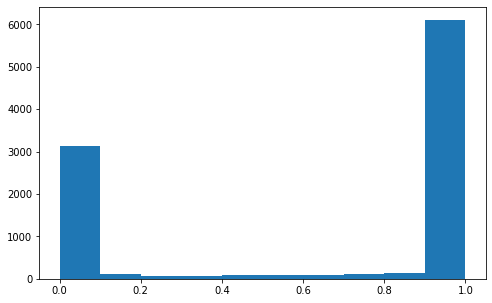

In [24]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [25]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.0923

In [26]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, 0.1, gamma=-10, zeta=10)

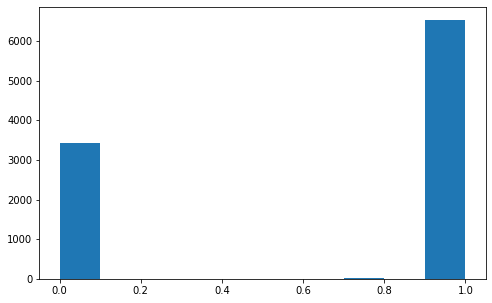

In [27]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [28]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.0047

In [29]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, 0.1, gamma=-10, zeta=0.8)

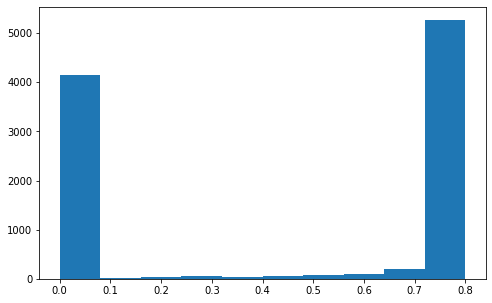

In [30]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [31]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.5843

In [32]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, 0.1, gamma=-0.1, zeta=0.8)

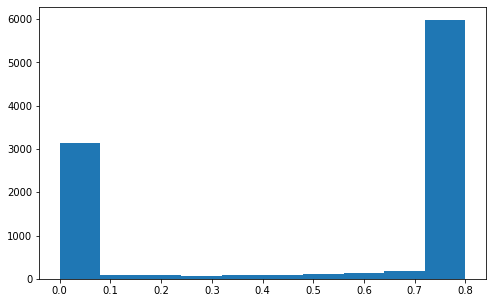

In [33]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [34]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.6829

In [35]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, temperature=0.5, gamma=-0.1, zeta=1.1)

In [36]:
np.mean((x_hard_concrete > 0.1) & (x_hard_concrete < 0.99))

0.433

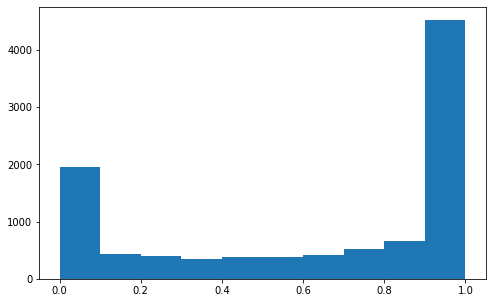

In [37]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

$Q_{\bar{s}}(0|\phi) <=> \bar{s} \leq 0$ 

Skipping the derivation: <br><br>
$Q_{\bar{s}}(\bar{s} \gt 0|\phi) = 1 - Q_{\bar{s}}(0|\phi) = Sigmoid(log (\alpha) - \beta * log(-\gamma / \zeta)$

In [42]:
sigmoid(0.619 - 0.5 * np.log(0.1 / 1.1))

0.8603196773961528

In [43]:
# try something different
sigmoid(0.619 - 0.1 * np.log(0.1 / 1.1))

0.7024076898771937

In [44]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, temperature=0.1, gamma=-0.1, zeta=1.1)

In [45]:
np.mean(x_hard_concrete > 0)

0.6999

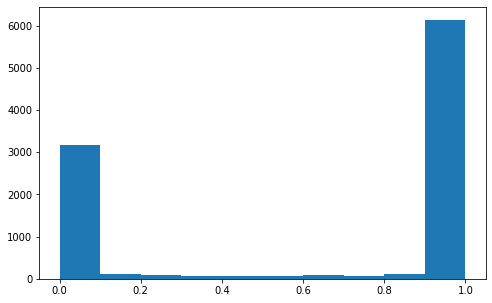

In [46]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [51]:
# try something different
sigmoid(0.619 - 0.2 * np.log(0.05 / 1))

0.771737195404293

In [52]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 0.619, temperature=0.2, gamma=-0.05, zeta=1)

In [53]:
np.mean(x_hard_concrete > 0)

0.7705

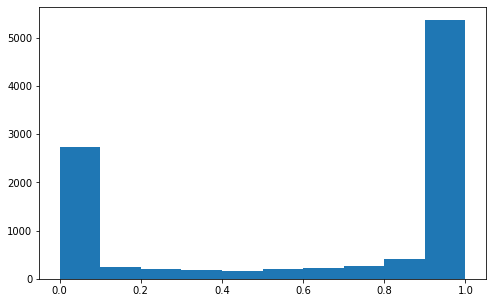

In [54]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);

In [57]:
x_hard_concrete = hard_concrete_sample(10 ** 4, 1, temperature=0.5, gamma=-0.1, zeta=1.1)

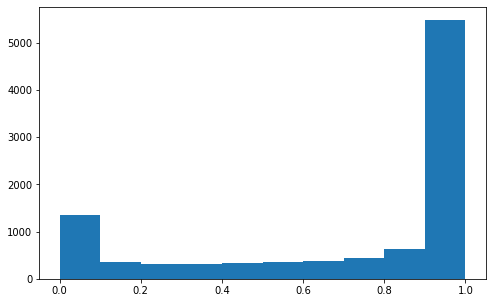

In [58]:
plt.subplots(figsize=(8, 5))
plt.hist(x_hard_concrete);